In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import math

In [3]:
df = pd.read_csv('../2.Feature Engineering/new data/modelling_set.csv')

In [4]:
df.head()

,Year,MemberID,LabCount_total,LabCount_max,LabCount_min,LabCount_ave,LabCount_months,LabCount_std,DrugCount_total,DrugCount_max,...,ProcedureGroup_Count_SO,ProcedureGroup_Count_SMCD,AgeAtFirstClaim,Male,Female,MissSex,MissAge,ClaimsTruncated,TARGET,trainset
0,Y1,210,2.0,2.0,2.0,2.0,1.0,-1.0,5.0,2.0,...,0,0,35,0,0,1,0,0,0.0,1
1,Y2,210,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,0.0,...,0,0,35,0,0,1,0,0,0.0,1
2,Y3,210,1.0,1.0,1.0,1.0,1.0,-1.0,5.0,2.0,...,0,0,35,0,0,1,0,0,NaN,0
3,Y1,3889,10.0,10.0,10.0,10.0,1.0,-1.0,30.0,5.0,...,0,0,45,0,1,0,0,0,0.0,1
4,Y1,11951,3.0,3.0,3.0,3.0,1.0,-1.0,0.0,0.0,...,0,0,15,0,1,0,0,0,1.0,1


In [5]:
df.shape

(218415, 145)

In [6]:
df.dtypes

Year                object
MemberID             int64
LabCount_total     float64
LabCount_max       float64
LabCount_min       float64
                    ...   
MissSex              int64
MissAge              int64
ClaimsTruncated      int64
TARGET             float64
trainset             int64
Length: 145, dtype: object

In [13]:
df.describe()

,MemberID,LabCount_total,LabCount_max,LabCount_min,LabCount_ave,LabCount_months,LabCount_std,DrugCount_total,DrugCount_max,DrugCount_min,...,ProcedureGroup_Count_SO,ProcedureGroup_Count_SMCD,AgeAtFirstClaim,Male,Female,MissSex,MissAge,ClaimsTruncated,TARGET,trainset
count,2.184150e+05,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,...,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.0,218415.000000,147473.000000,218415.000000
mean,4.993458e+07,6.471827,3.829439,2.181860,2.918800,1.655033,0.578166,10.387318,2.193531,0.962237,...,0.001699,0.015457,47.750155,0.363524,0.448078,0.188398,0.0,0.054863,0.452951,0.675196
std,2.892479e+07,7.734678,3.440373,2.507408,2.676663,1.906704,1.683426,15.721582,2.271990,1.057978,...,0.047286,0.262061,23.238375,0.481015,0.497298,0.391031,0.0,0.227714,1.573818,0.468303
min,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.478774e+07,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,4.993677e+07,4.000000,4.000000,1.000000,2.666667,1.000000,0.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,7.515525e+07,10.000000,7.000000,3.000000,5.000000,2.000000,1.527525,14.000000,4.000000,1.000000,...,0.000000,0.000000,65.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,9.999882e+07,111.000000,10.000000,10.000000,10.000000,12.000000,6.363961,84.000000,7.000000,7.000000,...,4.000000,23.000000,80.000000,1.000000,1.000000,1.000000,0.0,1.000000,15.000000,1.000000


In [14]:
df_train = df[df['trainset']==1]

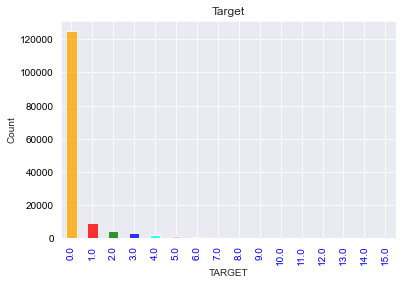

In [19]:
import seaborn as sns
import scipy.stats as st
import itertools

color = sns.color_palette()
sns.set_style('darkgrid')

plt.title("Target")
plt.ylabel('Count')
plt.xlabel('Times')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_train.groupby(['TARGET']).size().plot( 
    kind='bar',
    alpha=0.8, linewidth=1,
    color=my_colors
)


In [20]:
df_train.groupby(['TARGET']).size()

TARGET
0.0     124975
1.0       9299
2.0       4548
3.0       2882
4.0       1819
5.0       1093
6.0        660
7.0        474
8.0        316
9.0        263
10.0       209
11.0       145
12.0       135
13.0       111
14.0        65
15.0       479
dtype: int64

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

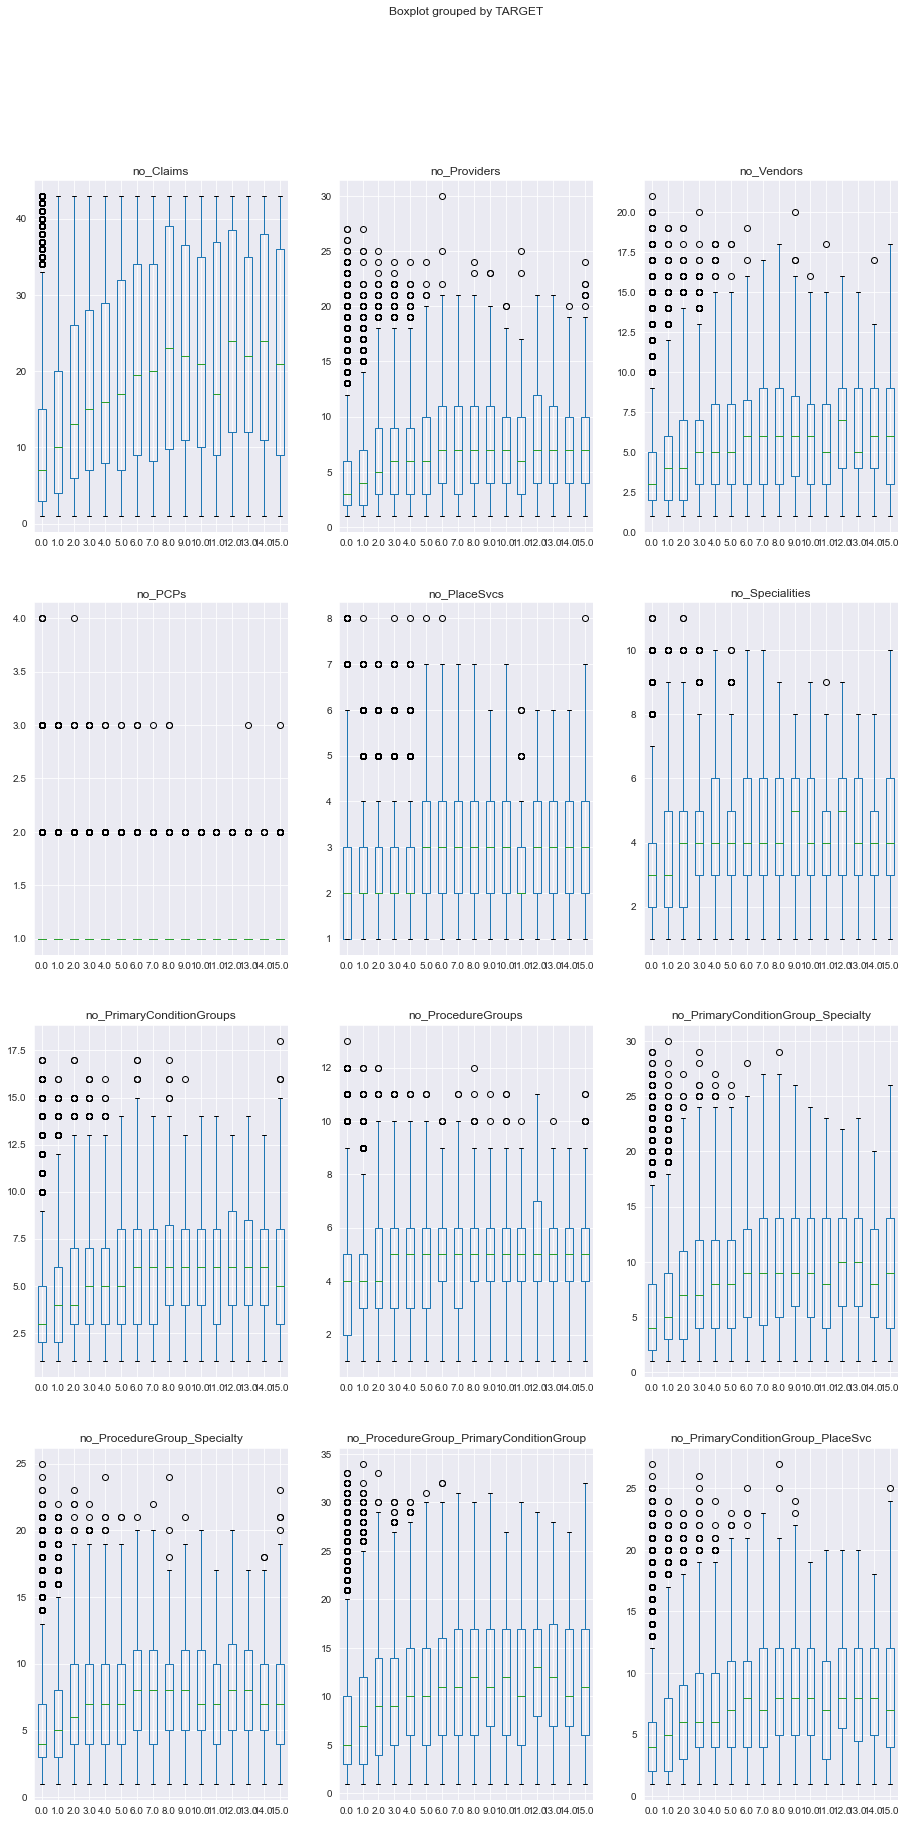

In [21]:
ls_num_data = [col for col in df_train.columns if 'no_' in col]
ncols = 3
nrows = int(math.ceil(len(ls_num_data) * 1.0 / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Visualization of numerical data
for idx, var in enumerate(ls_num_data):
    i = idx // ncols
    j = idx % ncols
    axes[i, j].get_xaxis().get_label().set_visible(False)
    df.boxplot(column=var, by='TARGET', ax=axes[i, j])

In [47]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

m = (df_train.columns != 'TARGET') & (df_train.columns != 'MemberID') & (df_train.columns != 'Year') & (df_train.columns != 'trainset')
X = df_train.loc[:, m]
y = df_train['TARGET']

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
#scaler = StandardScaler().fit(X)
X_new = scaler.transform(X)
#X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=123)


clf = RandomForestRegressor(max_depth=5, random_state=0)
clf.fit(X, y)

RandomForestRegressor(max_depth=5, random_state=0)

Feature ranking:
1. feature 140 ClaimsTruncated (0.186243)
2. feature 12 no_Claims (0.180747)
3. feature 138 MissSex (0.148270)
4. feature 135 AgeAtFirstClaim (0.073533)
5. feature 96 PrimaryConditionGroup_Count_PRGNCY (0.049612)
6. feature 56 Specialty_Count_Emergency (0.034085)
7. feature 33 DSFS_sum (0.032175)
8. feature 38 CharlsonIndex_sum (0.031078)
9. feature 65 PlaceSvc_Count_Inpatient Hospital (0.021496)
10. feature 104 PrimaryConditionGroup_Count_RENAL2 (0.019401)
11. feature 9 DrugCount_ave (0.014939)
12. feature 124 ProcedureGroup_Count_SIS (0.011402)
13. feature 7 DrugCount_max (0.008995)
14. feature 0 LabCount_total (0.007579)
15. feature 18 no_PrimaryConditionGroups (0.006463)
16. feature 66 PlaceSvc_Count_Urgent Care (0.005519)
17. feature 46 no_PrimaryConditionGroup_PlaceSvc (0.005508)
18. feature 6 DrugCount_total (0.005412)
19. feature 30 LOS_TOT_UNKNOWN (0.004778)
20. feature 100 PrimaryConditionGroup_Count_HEMTOL (0.004748)
21. feature 41 CharlsonIndex_ave (0.00435

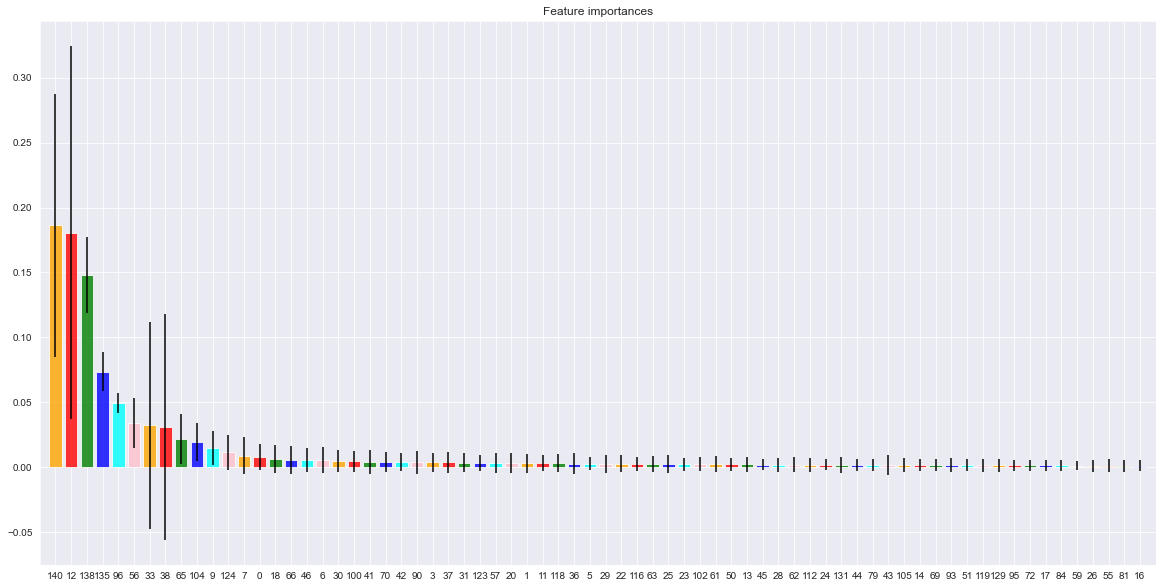

In [48]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# Plot all features importances of the forest
'''
for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
'''

# Plot 70 features first importances of the forest
for f in range(70):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(70), importances[indices[range(70)]],
       color=my_colors, yerr=std[indices[range(70)]], align="center", alpha=0.8, linewidth=1)
plt.xticks(range(70), indices[range(70)])
plt.xlim([-1, 70])


plt.show()

In [49]:
df_train.nlargest(70, 'TARGET').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MemberID,70.0,1.060285e+07,5.427761e+06,33120.0,6472527.00,10708536.5,1.508390e+07,20110099.0
LabCount_total,70.0,1.432857e+01,1.391561e+01,0.0,5.25,10.5,1.875000e+01,68.0
LabCount_max,70.0,6.228571e+00,3.266747e+00,0.0,4.00,6.0,9.750000e+00,10.0
LabCount_min,70.0,3.014286e+00,2.694562e+00,0.0,1.00,2.0,5.000000e+00,10.0
LabCount_ave,70.0,4.512121e+00,2.581420e+00,0.0,3.00,4.2,6.486111e+00,10.0
...,...,...,...,...,...,...,...,...
MissSex,70.0,2.857143e-01,4.550158e-01,0.0,0.00,0.0,1.000000e+00,1.0
MissAge,70.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.000000e+00,0.0
ClaimsTruncated,70.0,3.000000e-01,4.615663e-01,0.0,0.00,0.0,1.000000e+00,1.0
TARGET,70.0,1.500000e+01,0.000000e+00,15.0,15.00,15.0,1.500000e+01,15.0


In [176]:
def plt_df(df, title_plt):
    my_colors = ['green','red', 'blue','orange', 'cyan', 'pink']
    df.plot( 
        kind='bar',
        alpha=0.6, linewidth=1,
        color=my_colors,
        figsize=(20,10),
        title = title_plt
        
    )

-----
ClaimsTruncated
  ClaimsTruncated   TARGET        
                       sum   count
0               0  54497.0  139458
1               1  12301.0    8015
-----
no_Claims
   no_Claims  TARGET       
                 sum  count
0          1  2680.0  12825
1          2  2564.0  11754
2          3  2407.0  11187
3          4  2771.0  10250
4          5  2352.0   9101
5          6  2145.0   8280
6          7  2385.0   7337
7          8  2264.0   6332
8          9  2139.0   5903
9         10  1943.0   5223
10        11  1854.0   4732
11        12  1632.0   4215
12        13  1784.0   3762
13        14  1551.0   3500
14        15  1625.0   3149
15        16  1713.0   2892
16        17  1538.0   2683
17        18  1220.0   2330
18        19  1319.0   2148
19        20  1240.0   1953
-----
MissSex
  MissSex   TARGET        
               sum   count
0       0  41769.0  119392
1       1  25029.0   28081
-----
AgeAtFirstClaim
  AgeAtFirstClaim   TARGET       
                       sum  

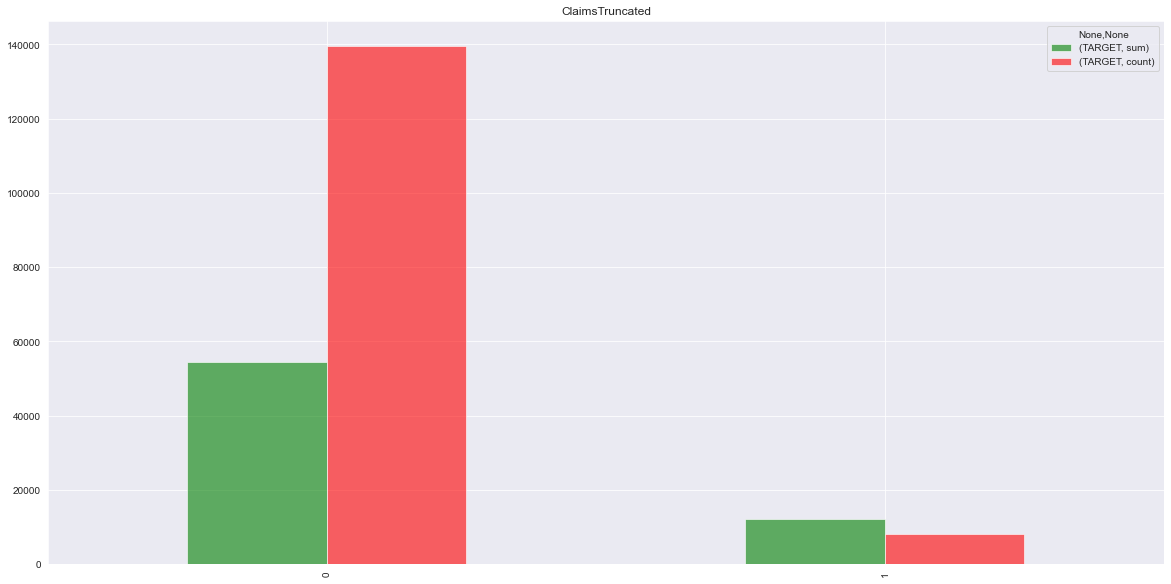

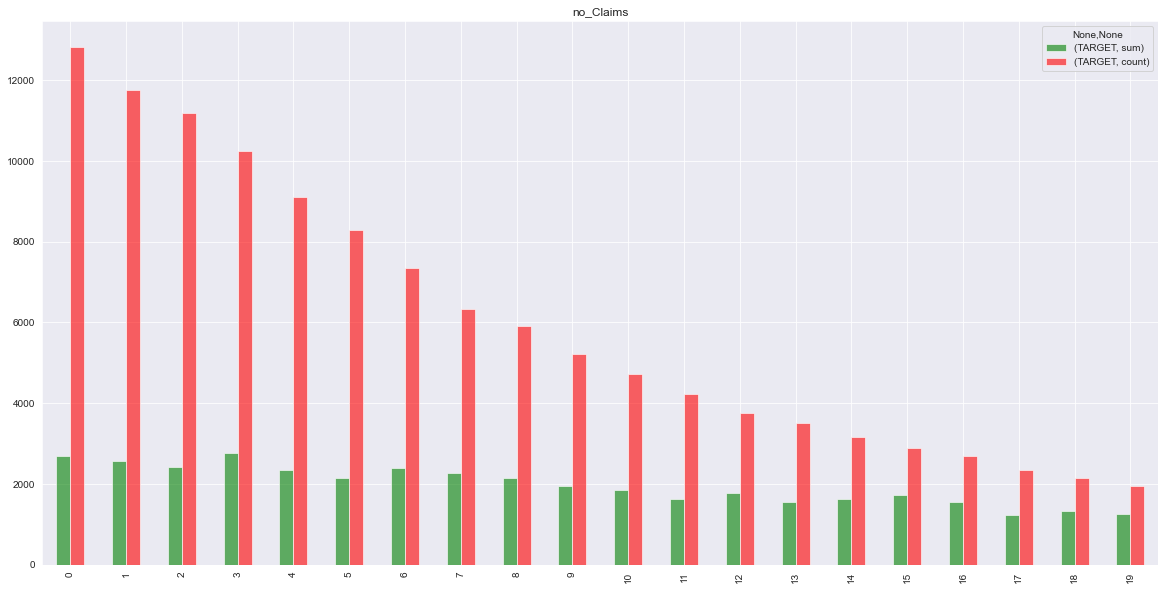

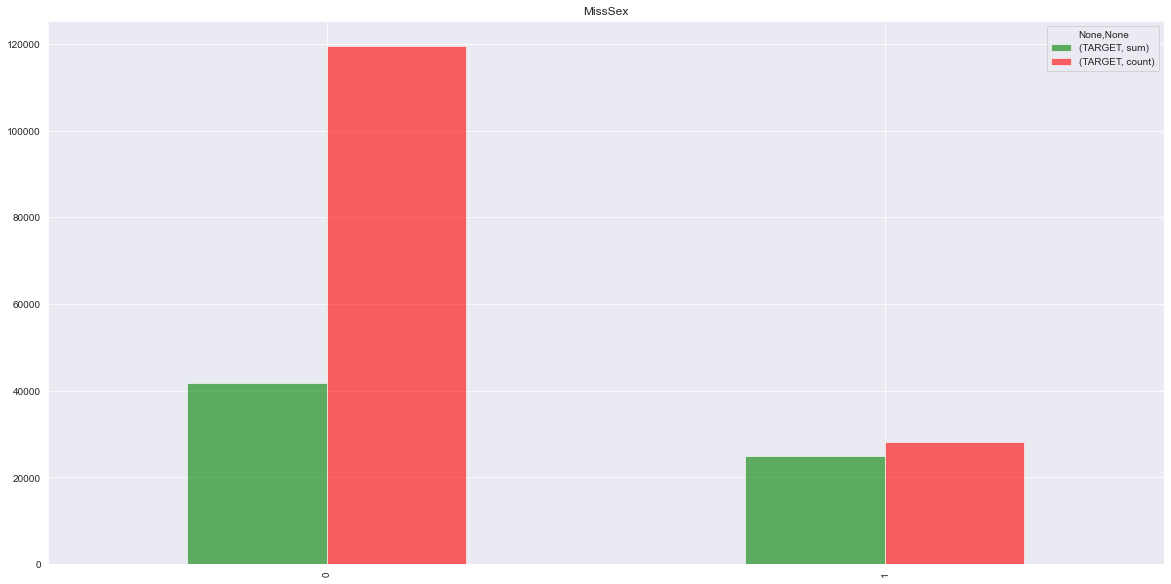

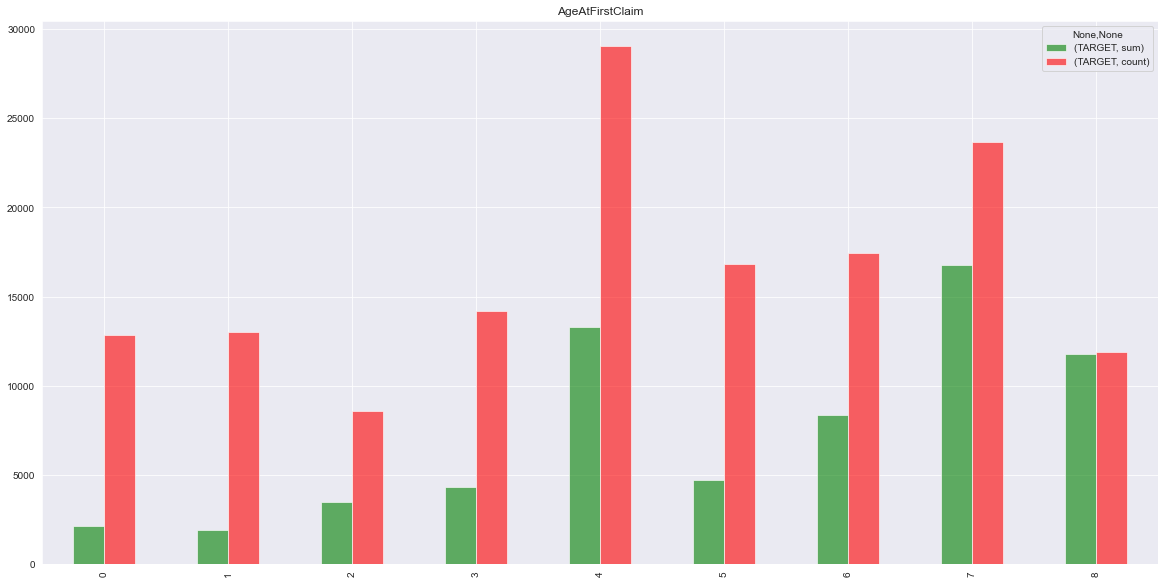

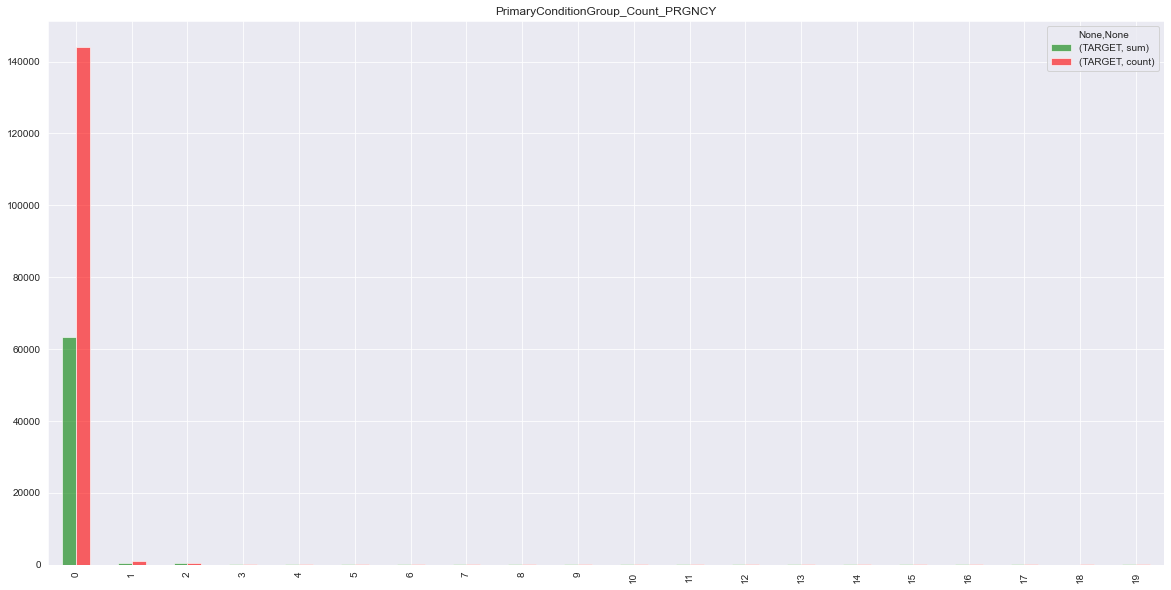

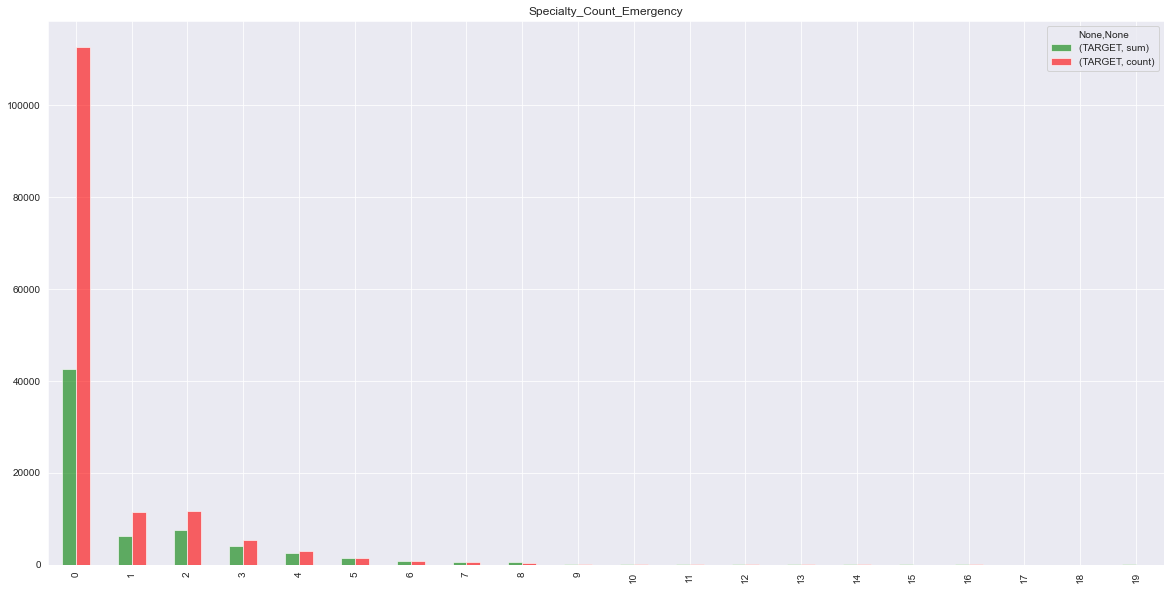

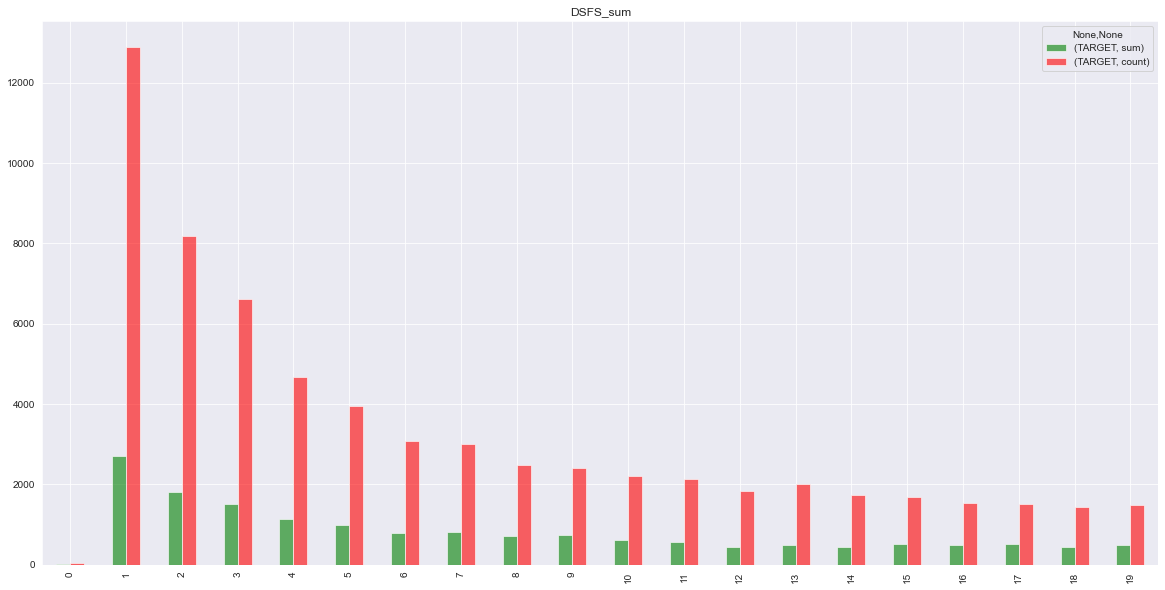

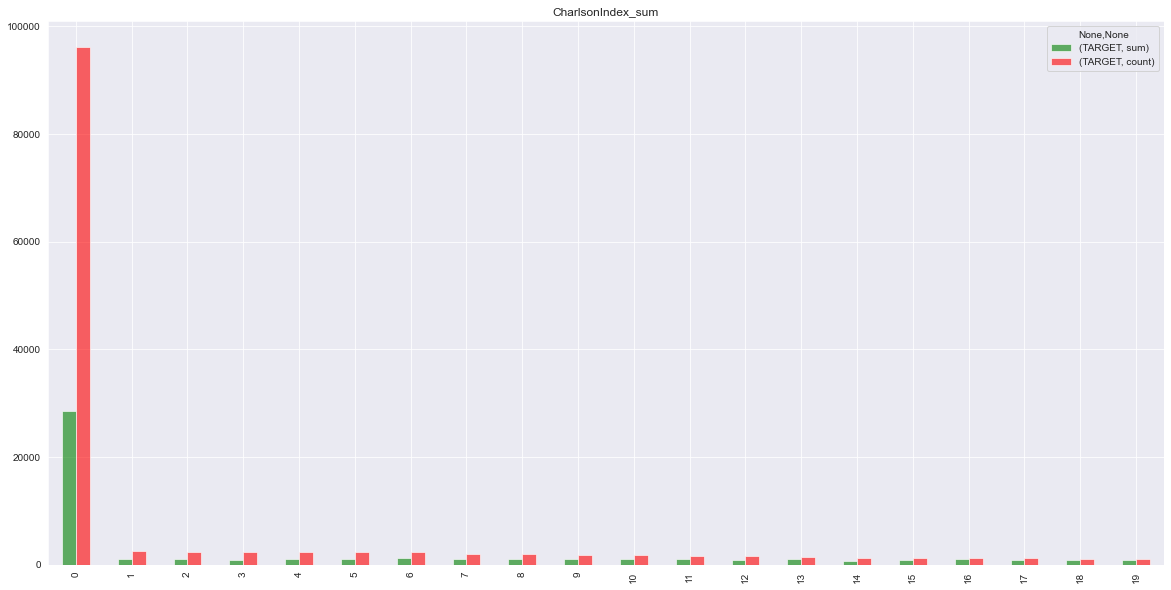

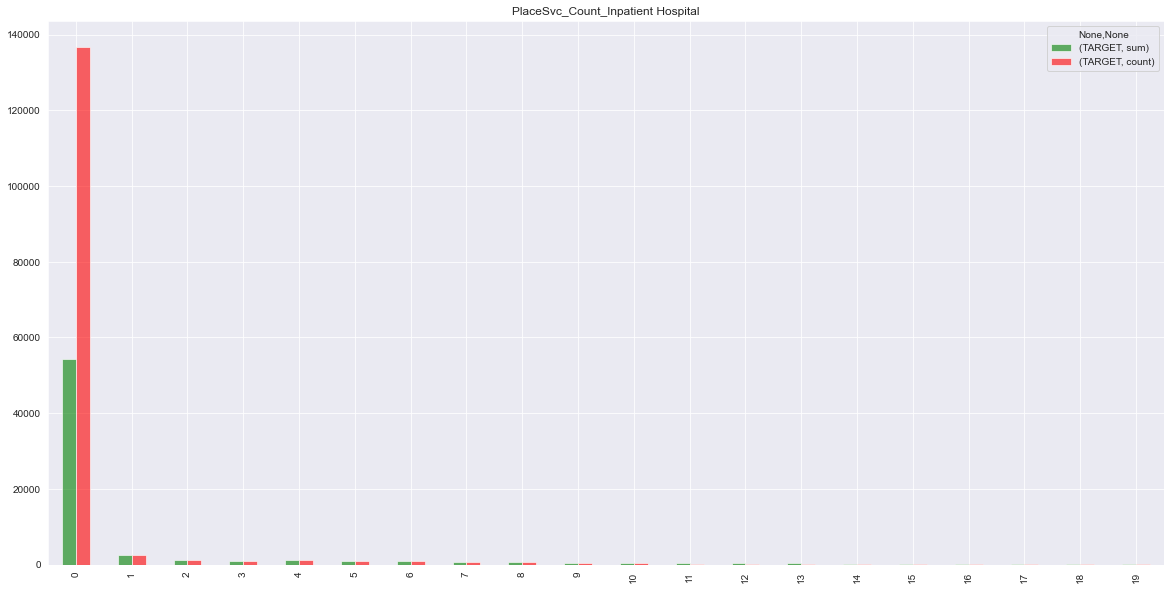

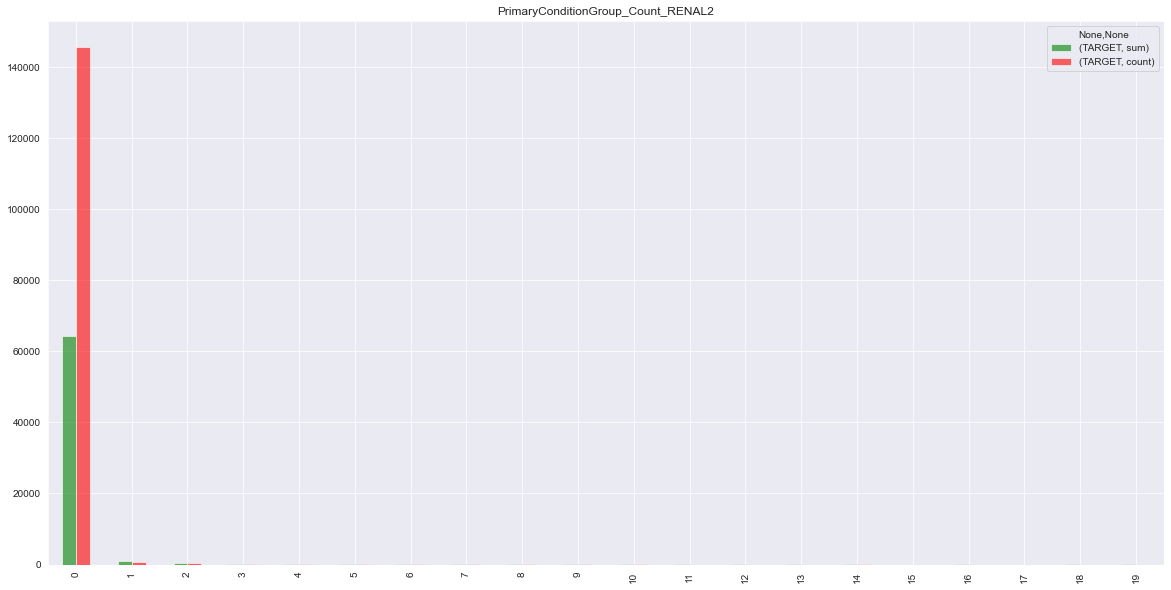

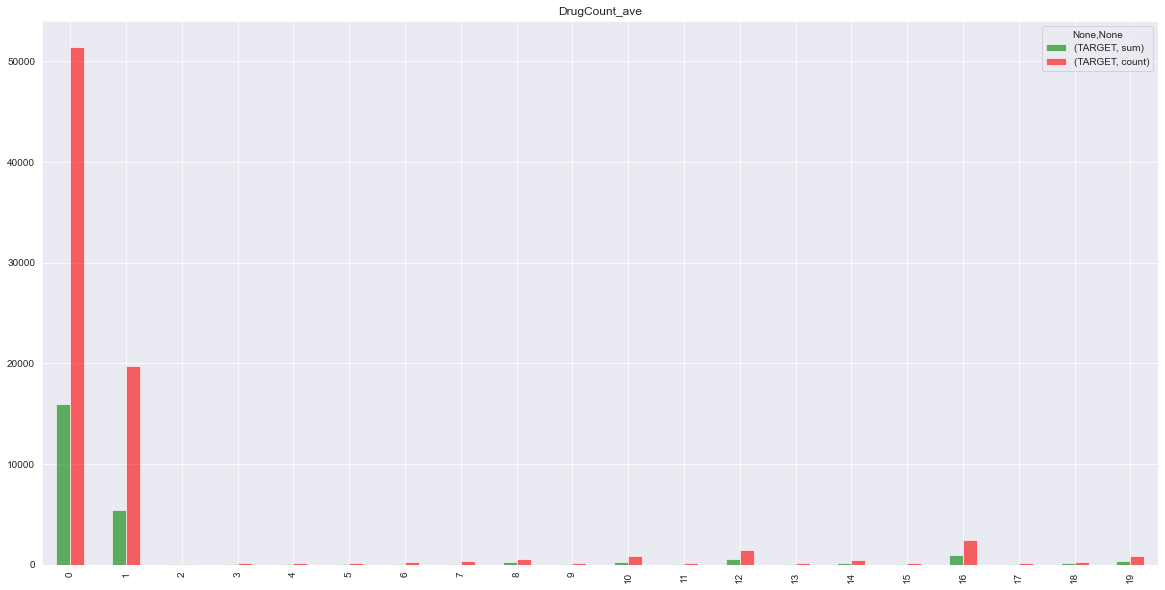

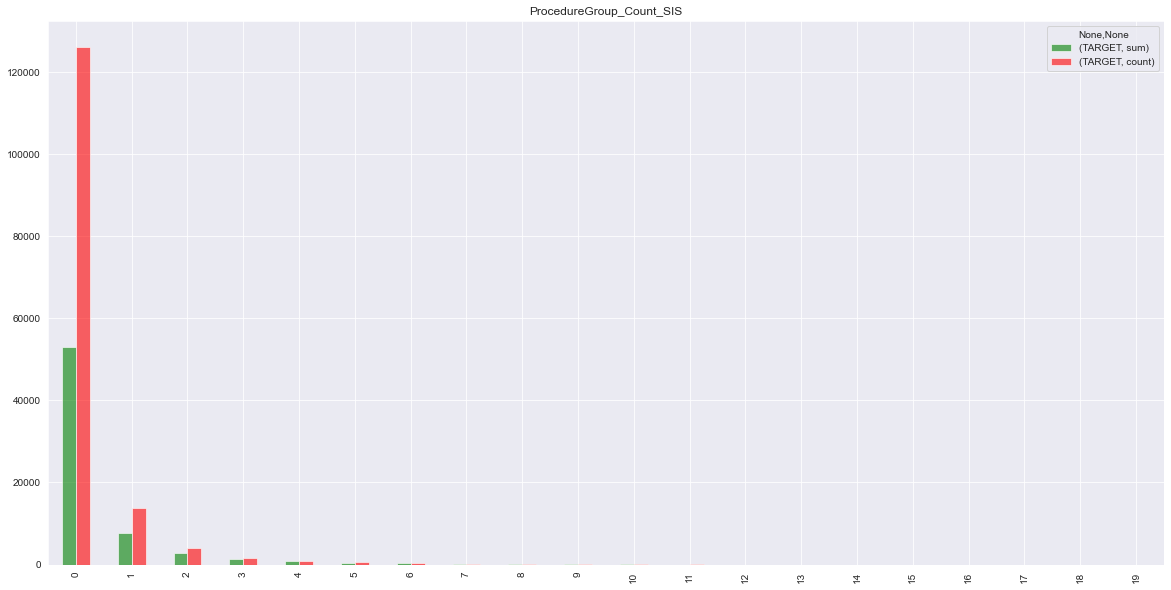

In [183]:
for f in range(12):
    col = X.columns[indices[f]]

    df_new = pd.DataFrame()
    df_group = df_train.groupby([col])
    df_new = df_group.agg({
        'TARGET': ['sum','count'],

    }).reset_index()
    print('-----')
    print(col)
    print(df_new.head(20))
    df_new.drop(df_new.columns[0], axis=1, inplace=True)
    plt_df(df_new.iloc[0:20,:], col)


